# Linear Regression
Implement Linear regression model using pytorch.nn.Linear

## import packages

In [56]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

## Data preparation

In [57]:
# 0) Data preparation
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], -1)

n_samples, n_features = X.shape

## Define model

In [58]:
# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

## Define loss function and optimizer

In [59]:
# 2) loss and optimizer
learning_rate = .01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Training loop


In [60]:
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f"epoch: {epoch + 1}, loss = {loss.item():.4f}")

epoch: 10, loss = 4441.1587
epoch: 20, loss = 3313.1062
epoch: 30, loss = 2496.6565
epoch: 40, loss = 1905.1172
epoch: 50, loss = 1476.1171
epoch: 60, loss = 1164.7158
epoch: 70, loss = 938.4908
epoch: 80, loss = 774.0190
epoch: 90, loss = 654.3600
epoch: 100, loss = 567.2479


## Plot

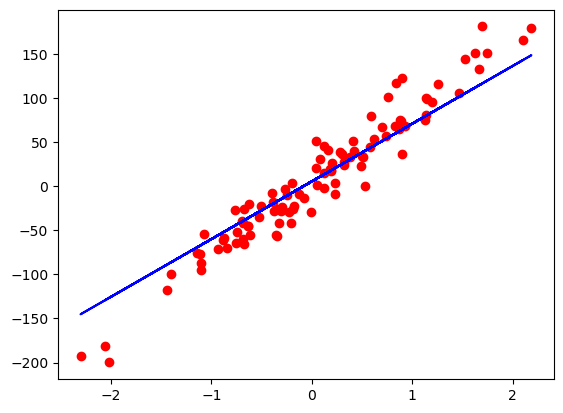

In [61]:
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
